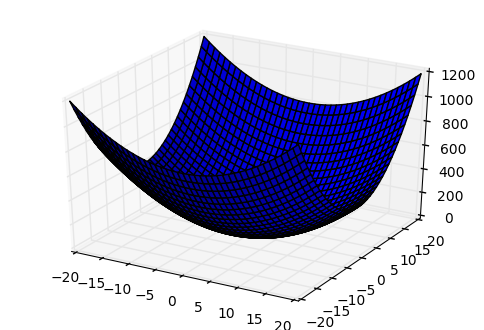

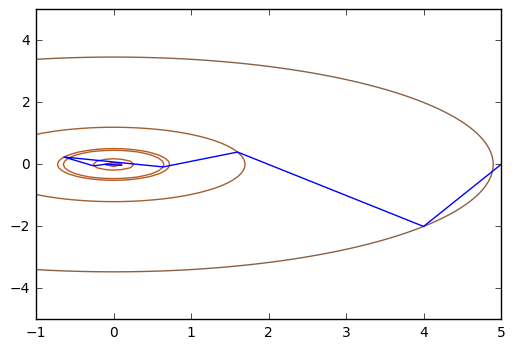

10.0	&	10.0	&	14.1421356237 \\
4.0	&	-2.0	&	4.472135955 \\
1.6	&	0.4	&	1.64924225025 \\
0.64	&	-0.08	&	0.644980619864 \\
-0.64	&	0.24	&	0.683520299625 \\
-0.256	&	-0.048	&	0.260461129538 \\
-0.1024	&	0.0096	&	0.102849015552 \\
0.1024	&	-0.0288	&	0.106372928887 \\


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def f(x):
    return x[0]**2 + 2*x[1]**2


def grad_f(x):
    return np.array([2*x[0], 4*x[1]])


def grad_descent_fss(x0, grad_f, max_iter=20, tol=10e-4, step_size=0.4):
    if np.linalg.norm(grad_f(x0)) < tol:
        return []

    x_seq = []

    iter = 0
    xk = x0
    while iter < max_iter and np.linalg.norm(grad_f(xk)) > tol:
        dk = -grad_f(xk)
        x_seq.append(np.copy(xk))
        xk += step_size * dk
        iter += 1

    return np.array(x_seq)


def grad_descent_btls(x0,  f, grad_f, max_iter=20, tol=10e-2, alpha=0.1, beta=0.3):
    if np.linalg.norm(grad_f(x0)) < tol:
        return []

    x_seq = []

    iter = 0
    xk = x0
    while iter < max_iter and np.linalg.norm(grad_f(xk)) > tol:
        dk = -grad_f(xk)

        # Backtrack line search
        step_size = 1.0
        while f(xk + step_size * dk) > (f(xk) + alpha * step_size * dk.dot(dk)):
            step_size *= beta

        x_seq.append(np.copy(xk))
        xk += step_size * dk

        iter += 1

    return np.array(x_seq)


graph_range = [-20, 20]
sp = [10, 10]

# seq_x = grad_descent_fss(sp, grad_f=grad_f)
seq_x = grad_descent_btls(sp, f=f, grad_f=grad_f)

X = np.arange(graph_range[0], graph_range[1], 0.1)
Y = np.arange(graph_range[0], graph_range[1], 0.1)
X, Y = np.meshgrid(X, Y)
Z = f([X, Y])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)    
plt.show()

levels = sorted([f(x) for x in seq_x])
    
plt.figure()
norm = colors.LogNorm(vmin=Z.min(), vmax=Z.max())
plt.contour(X, Y, Z, levels=levels, cmap='Accent', norm=norm)
plt.plot(seq_x[:, 0], seq_x[:, 1])
plt.xlim([-1,5])
plt.ylim([-5,5])
plt.show()

for p in seq_x:
    norm_p = np.linalg.norm(p)
    print(str(p[0]) + '\t&\t' + str(p[1]) + '\t&\t' + str(norm_p) + ' \\\\')